In [21]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure

import networkx as nx
import nxviz as nv
from nxviz import utils 
from nxviz import lines # Customize node styling 
from adjustText import adjust_text
from matplotlib import pyplot as plt, colors
from nxviz import nodes, plots, lines, layouts
import matplotlib.pyplot as plt 
import pandas as pd 
from nxviz import encodings as aes 
from nxviz import nodes, edges, annotate, utils
from nxviz.plots import aspect_equal, despine 

In [2]:
def group_colormap(data: pd.Series): 
    cmap = {"Drug Set A": "red", "Drug Set B": "blue", "Round profiled": "black"} 
    return data.apply(lambda x: cmap.get(x)) 

In [3]:
nwko = pd.read_csv('Sankey_output.csv')
nwko

Unnamed: 0 drug_col_recover_id drug_row_recover_id  synergy_bliss_max  \
0             0   RE-MOL-0001495947   RE-MOL-0000575642                0.0   
1             1   RE-MOL-0001140916   RE-MOL-0000575642               24.1   
2             2   RE-MOL-0000584536   RE-MOL-0000575642                1.9   
3             3   RE-MOL-0001376287   RE-MOL-0000575642               10.1   
4             4   RE-MOL-0000019937   RE-MOL-0000575642                3.6   
..          ...                 ...                 ...                ...   
141         141   RE-MOL-0001317309   RE-MOL-0000584456               23.7   
142         142   RE-MOL-0000001178   RE-MOL-0000584456               12.2   
143         143   RE-MOL-0001495681   RE-MOL-0000408487               25.4   
144         144   RE-MOL-0000401940   RE-MOL-0000408487               -1.9   
145         145   RE-MOL-0000023446   RE-MOL-0000968222               10.6   

    cell_line_name  preds_mean  preds_std      score        round  \
0             MCF7   32.175810   3.475047  35.650857  Calibration   
1             MCF7   15.764807   6.448794  22.213601  SMO Round 1   
2             MCF7   15.379181   4.574558  19.953739  SMO Round 1   
3             MCF7   13.956803   6.015639  19.972443  SMO Round 1   
4             MCF7   20.723950   7.460007  28.183956    Diversity   
..             ...         ...        ...        ...          ...   
141           MCF7   12.503742   2.832405  15.336147    Diversity   
142           MCF7   14.873702   4.925148  19.798850  SMO Round 1   
143           MCF7   16.275003   4.709943  20.984946  SMO Round 3   
144           MCF7   11.486040   2.463049  13.949089    Diversity   
145           MCF7    9.960328   1.851298  11.811626    Diversity   

          recover_id_x                         name_x       recover_id_y  \
0    RE-MOL-0001495947                       hhgv-678  RE-MOL-0000575642   
1    RE-MOL-0001140916                    dacomitinib  RE-MOL-0000575642   
2    RE-MOL-0000584536                     bms-582949  RE-MOL-0000575642   
3    RE-MOL-0001376287                    spebrutinib  RE-MOL-0000575642   
4    RE-MOL-0000019937        terazosin hydrochloride  RE-MOL-0000575642   
..                 ...                            ...                ...   
141  RE-MOL-0001317309                       apatinib  RE-MOL-0000584456   
142  RE-MOL-0000001178  trifluoperazine hydrochloride  RE-MOL-0000584456   
143  RE-MOL-0001495681                     ribociclib  RE-MOL-0000408487   
144  RE-MOL-0000401940                     pd-0325901  RE-MOL-0000408487   
145  RE-MOL-0000023446                  betamethasone  RE-MOL-0000968222   

                    name_y  
0              cabazitaxel  
1              cabazitaxel  
2              cabazitaxel  
3              cabazitaxel  
4              cabazitaxel  
..                     ...  
141            vemurafenib  
142            vemurafenib  
143             vismodegib  
144             vismodegib  
145  ruxolitinib phosphate  

[146 rows x 13 columns]

In [5]:
nwko.drop(columns=['Unnamed: 0','drug_col_recover_id','drug_row_recover_id', 
                   'cell_line_name','preds_mean','preds_std','score', 'recover_id_x', 'recover_id_y'], 
          inplace=True)
nwko.rename(columns = {'name_x':'source','name_y':'target'}, inplace=True)
nwko

synergy_bliss_max        round                         source  \
0                  0.0  Calibration                       hhgv-678   
1                 24.1  SMO Round 1                    dacomitinib   
2                  1.9  SMO Round 1                     bms-582949   
3                 10.1  SMO Round 1                    spebrutinib   
4                  3.6    Diversity        terazosin hydrochloride   
..                 ...          ...                            ...   
141               23.7    Diversity                       apatinib   
142               12.2  SMO Round 1  trifluoperazine hydrochloride   
143               25.4  SMO Round 3                     ribociclib   
144               -1.9    Diversity                     pd-0325901   
145               10.6    Diversity                  betamethasone   

                    target  
0              cabazitaxel  
1              cabazitaxel  
2              cabazitaxel  
3              cabazitaxel  
4              cabazitaxel  
..                     ...  
141            vemurafenib  
142            vemurafenib  
143             vismodegib  
144             vismodegib  
145  ruxolitinib phosphate  

[146 rows x 4 columns]

In [6]:
tmp1 = nwko[['round','source','synergy_bliss_max']].rename(columns={'round':'source','source':'target'})
tmp2 = nwko[['source','target','synergy_bliss_max']].rename(columns={'source':'source','target':'target'})
tmp3 = nwko[['round','target','synergy_bliss_max']].rename(columns={'round':'source','target':'target'})
# and flip
tmp4 = nwko[['source','round','synergy_bliss_max']].rename(columns={'round':'target','source':'source'})
tmp5 = nwko[['target','source','synergy_bliss_max']].rename(columns={'source':'target','target':'source'})
tmp6 = nwko[['target','round','synergy_bliss_max']].rename(columns={'round':'target','target':'source'})

In [7]:
nwk = pd.concat([ tmp1,tmp2,tmp3,tmp4,tmp5,tmp6 ], axis=0, join ='outer')

In [8]:
nwk['scaled_synergy'] =  (( (nwk.synergy_bliss_max + 1.9) / (93.3 + 1.9) ) )
nwk['scaled_synergy_r'] = 1 - nwk['scaled_synergy']
nwk

source                   target  synergy_bliss_max  \
0              Calibration                 hhgv-678                0.0   
1              SMO Round 1              dacomitinib               24.1   
2              SMO Round 1               bms-582949                1.9   
3              SMO Round 1              spebrutinib               10.1   
4                Diversity  terazosin hydrochloride                3.6   
..                     ...                      ...                ...   
141            vemurafenib                Diversity               23.7   
142            vemurafenib              SMO Round 1               12.2   
143             vismodegib              SMO Round 3               25.4   
144             vismodegib                Diversity               -1.9   
145  ruxolitinib phosphate                Diversity               10.6   

     scaled_synergy  scaled_synergy_r  
0          0.019958          0.980042  
1          0.273109          0.726891  
2          0.039916          0.960084  
3          0.126050          0.873950  
4          0.057773          0.942227  
..              ...               ...  
141        0.268908          0.731092  
142        0.148109          0.851891  
143        0.286765          0.713235  
144        0.000000          1.000000  
145        0.131303          0.868697  

[876 rows x 5 columns]

In [9]:
nwk[nwk.scaled_synergy == 1]

source        target  synergy_bliss_max  scaled_synergy  \
87   SMO Round 2  alfacalcidol               93.3             1.0   
87  alfacalcidol    crizotinib               93.3             1.0   
87   SMO Round 2    crizotinib               93.3             1.0   
87  alfacalcidol   SMO Round 2               93.3             1.0   
87    crizotinib  alfacalcidol               93.3             1.0   
87    crizotinib   SMO Round 2               93.3             1.0   

    scaled_synergy_r  
87               0.0  
87               0.0  
87               0.0  
87               0.0  
87               0.0  
87               0.0

In [10]:
my_dict1 = dict.fromkeys(nwko['source'].unique(),'Drug Set A')
my_dict2 = dict.fromkeys(nwko['target'].unique(),'Drug Set B')
my_dict3 = dict.fromkeys(nwko['round'].unique(),'Round profiled')
my_dict = {**my_dict1, **my_dict2, **my_dict3}

In [11]:
G = nx.from_pandas_edgelist(nwk, 
                            source = 'source', 
                            target = "target", 
                            edge_key="synergy_bliss_max",
    create_using=nx.MultiGraph(),
                            edge_attr=["synergy_bliss_max","scaled_synergy","scaled_synergy_r"])
G = G.to_undirected()
nx.set_node_attributes(G, my_dict, 'Types')
nx.set_node_attributes(G, dict(nwk.groupby('source').mean().synergy_bliss_max), 'mean_synergy')

/var/folders/k3/yv9hq08j1vvbkzfmhdr7b05w0000gn/T/ipykernel_9114/3195942129.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nx.set_node_attributes(G, dict(nwk.groupby('source').mean().synergy_bliss_max), 'mean_synergy')


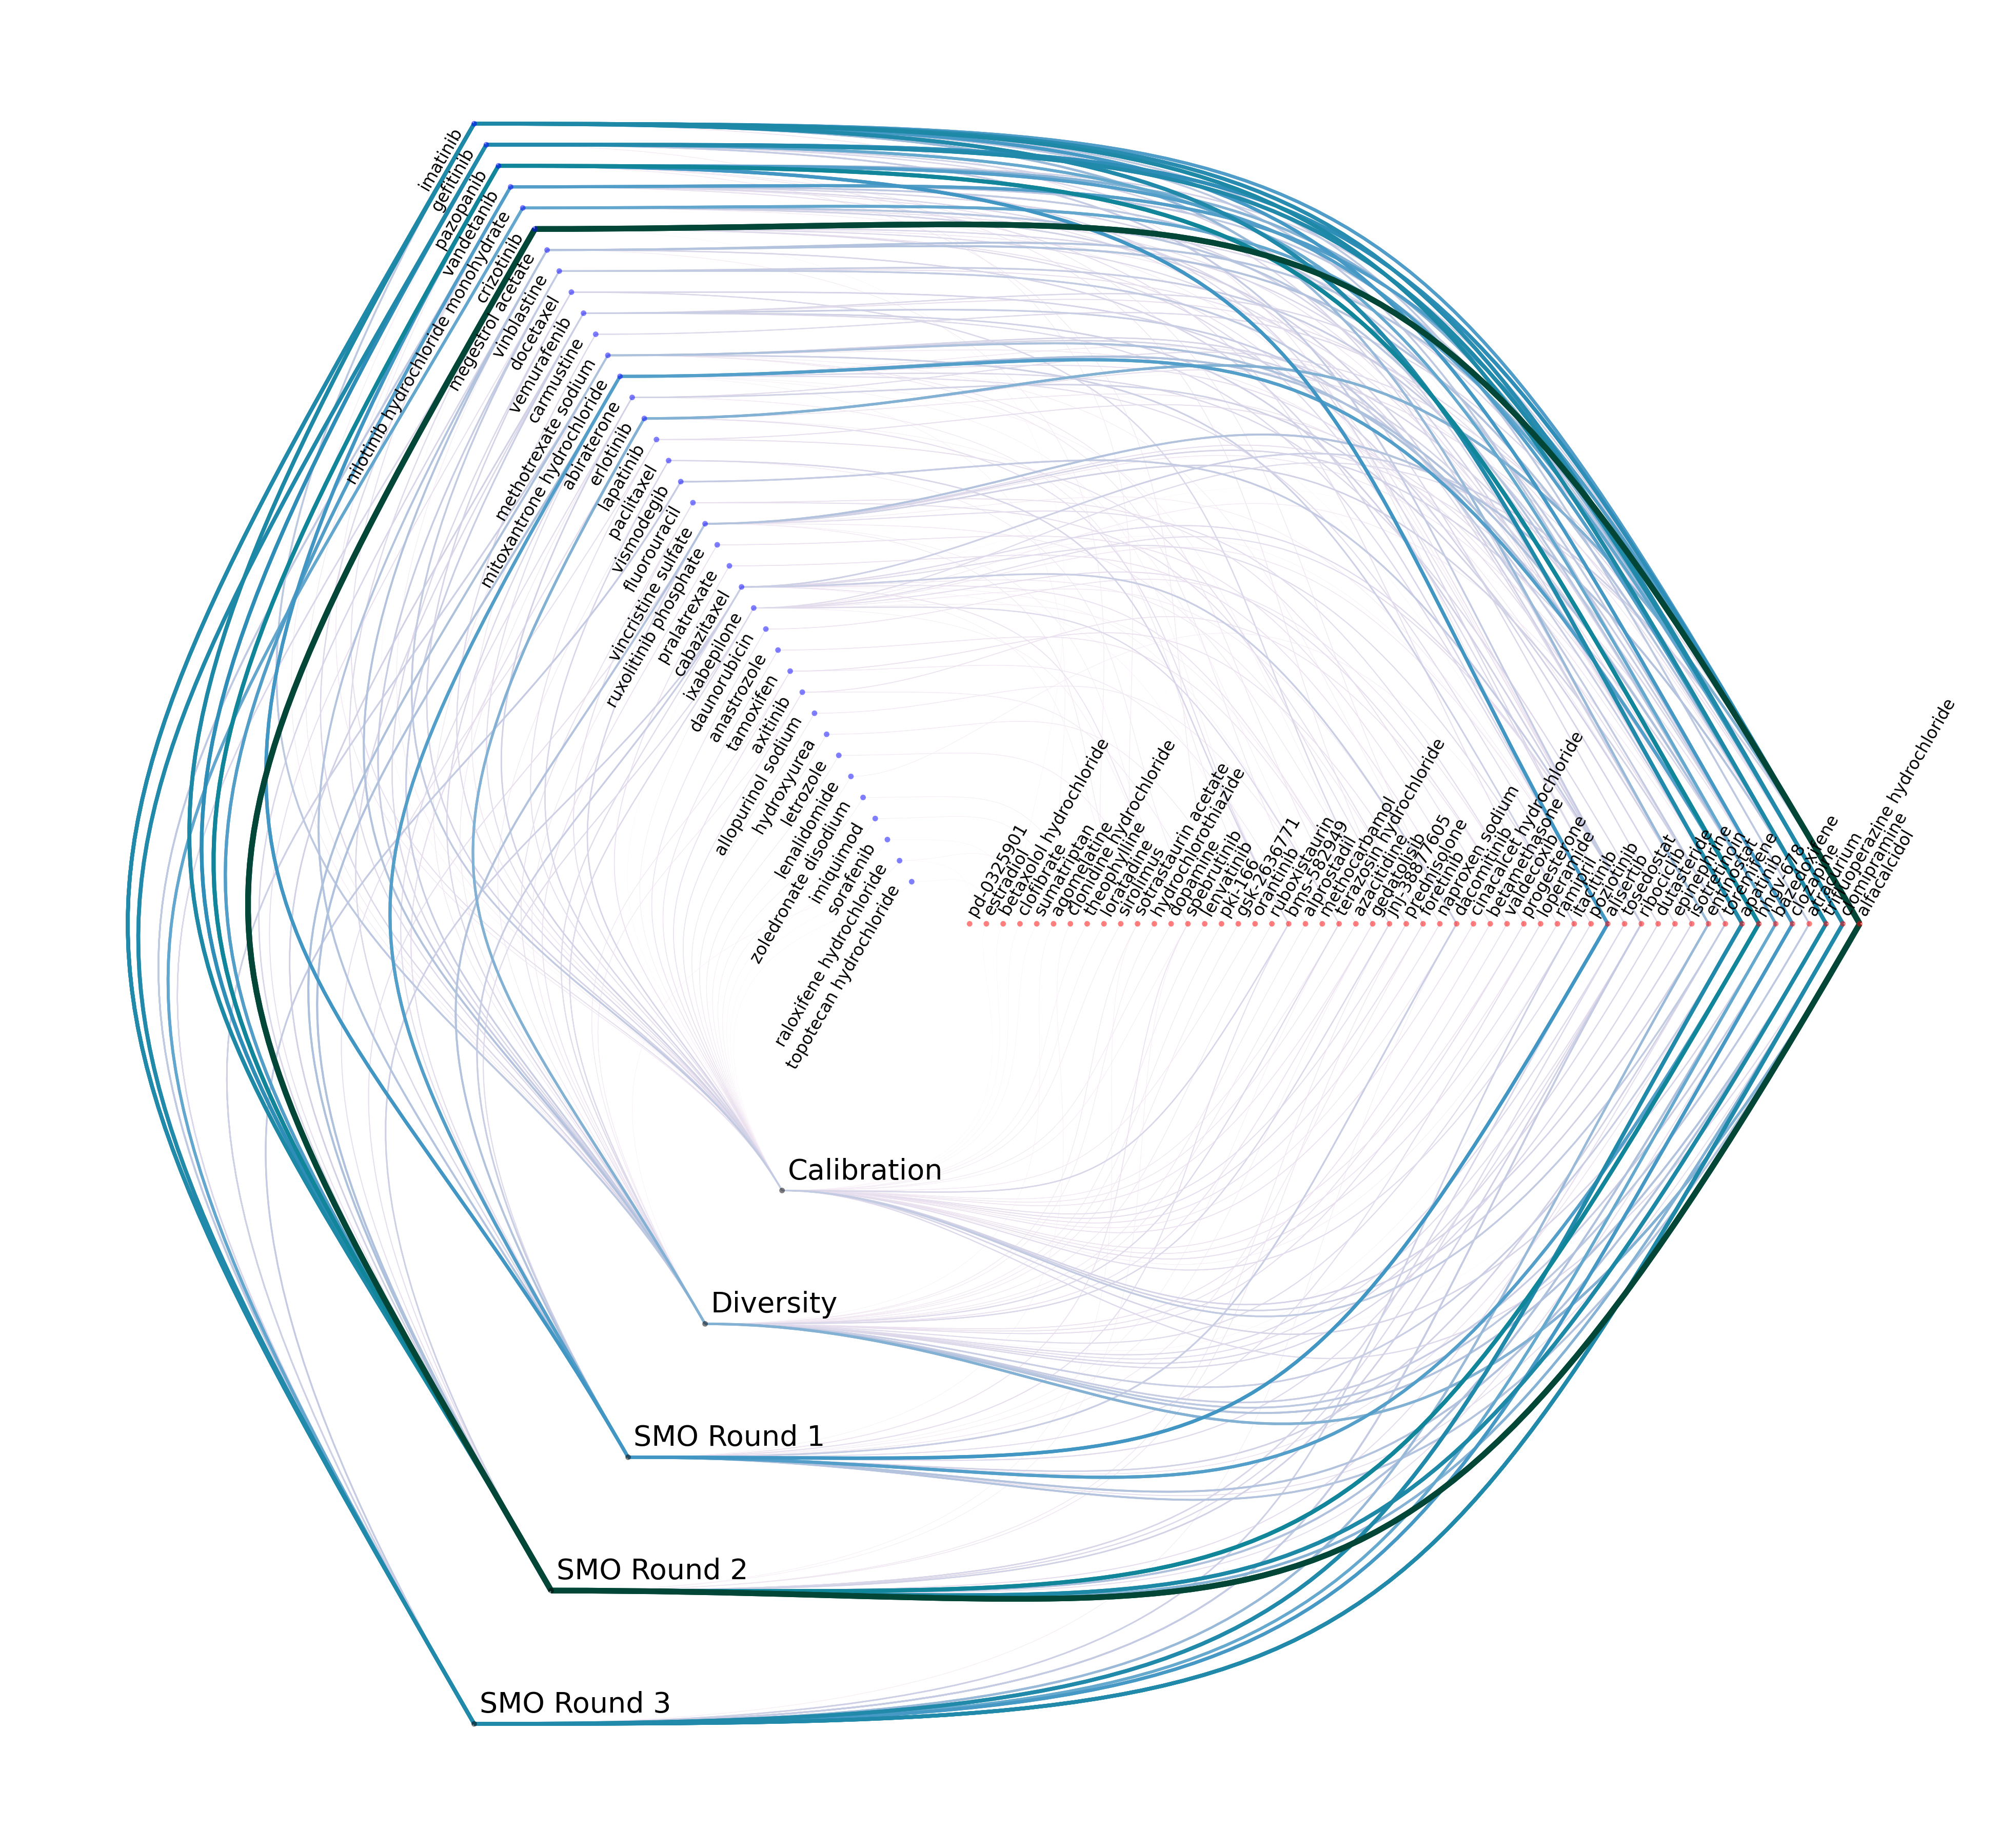

<Figure size 640x480 with 0 Axes>

In [22]:
cmap = plt.cm.PuBuGn
norm = colors.Normalize(vmin=0, vmax=1)

# pick colours 
ax = figure(figsize=(6, 6), dpi=800)

ax = plt.gca() # Customize node styling 

nt = utils.node_table(G) 
nt['node_size'] = (nt.mean_synergy + 5)/20
pos = layouts.hive(nt, group_by="Types", sort_by="mean_synergy", inner_radius = 2, 
                   rotation= 0*(-np.pi/3 - np.pi/2)  ) 
pos_cloned = layouts.hive(nt, group_by="Types", sort_by="mean_synergy", inner_radius = 2, 
                          rotation= 0*( -np.pi/3 - np.pi/2)  +  0.0001) 

scale_fac = 3

for a in my_dict1.keys():
    pos[a] = pos[a] * scale_fac
    pos_cloned[a] = pos_cloned[a] * scale_fac
    
for a in my_dict2.keys():
    pos[a] = pos[a] * scale_fac * (110 / 76)
    pos_cloned[a] = pos_cloned[a] * scale_fac

for a in my_dict3.keys():
    pos[a] = pos[a] * scale_fac * (110 / 12)
    pos_cloned[a] = pos_cloned[a] * scale_fac * (110 / 12)

node_color = group_colormap(nt["Types"]) 
alpha = nodes.transparency(nt, alpha_by=None) * 0.5
size = nodes.node_size(nt, "node_size") 
size = size / size
patches = nodes.node_glyphs( nt, pos, node_color=node_color, alpha=alpha, size=size ) 
for patch in patches: 
    ax.add_patch(patch)   
# edges 
et = utils.edge_table(G) 
et = et.sort_values(by = 'scaled_synergy')
et.index = range(len(et))
et['lwid'] = et['scaled_synergy'] * 1
#edge_color = edges.edge_colors(et, nt=None, color_by="scaled_synergy", node_color_by=None)
lw = edges.line_width(et, lw_by="lwid") 
alpha = edges.transparency(et, alpha_by="scaled_synergy") 
alpha = alpha*0 + 1

ed_colours = [cmap(norm(et.scaled_synergy[ii]))[:3] for ii in range(len(et))]


patches = lines.hive( et, pos = pos, pos_cloned=pos_cloned, edge_color=ed_colours, alpha=alpha, 
                     lw=lw , aes_kw={"fc": "none"} ) # , 
for patch in patches: 
    ax.add_patch(patch) 

texts=[]
for ii in pos.keys():
    if ii in my_dict1.keys():
        texts += [plt.text(x = pos[ii][0]-2, y=  pos[ii][1]+2, s = ii, ha='left', va='bottom', 
                           fontsize=3, rotation = 60)]
    if ii in my_dict2.keys():
        texts += [plt.text(x = pos[ii][0]-3, y=  pos[ii][1], s = ii, ha='right', va='top', 
                           fontsize=3, rotation = 60)]
    if ii in my_dict3.keys():
        texts += [plt.text(x = pos[ii][0] + 2, y=  pos[ii][1] + 2, s = ii, ha='left', va='bottom', fontsize=5)]

    
    
plots.rescale(G) 
plots.aspect_equal() 
plots.despine() 

plt.savefig("nwk_graphic.png", dpi=800,bbox_inches='tight', pad_inches=0.01)
plt.show()
plt.clf()
